# Linear Regression

## 1. Introduction

### 1.1 What is Linear Regression?

Linear regression is one of the simplest and most widely used techniques in both machine learning and statistics. It is used to model the relationship between a dependent variable (what you want to predict) and one or more independent variables (the inputs or features). The idea is to draw a straight line that best fits the data points — this line represents the trend or pattern in the data.

### 1.2 What is the Objective of Linear Regression Model?

The objective of linear regression is to **find the best-fitting line** that minimises the difference between the actual values and the predicted values. This difference is measured using a loss function, typically the **Mean Squared Error (MSE)**, which calculates the average of the squared differences. By adjusting the slope and intercept of the line, the model learns the relationship in the data so it can make accurate predictions on new inputs.


For example, if you're a real estate analyst trying to predict house prices based on median income in a suburb, linear regression can help you draw a line through the data that best explains how price changes with income. Once trained, the model can estimate the price of a house in a new suburb just by knowing the area's median income.

### 1.3 About This Notebook

This notebook introduces the key concepts behind **linear regression** and demonstrates how to use **gradient descent** to find the best-fitting line for a given dataset.

We start with a simple mathematical model:

$$
f(x) = X^T\theta
$$

Here, **X** is a matrix of input features with shape *(n × m)* — where *n* is the number of observations and *m* is the number of features. **θ** (theta) is a vector of weights, including the bias term. To keep things simple, we assume that the first column of **X** is always 1 (this represents the intercept), so the intercept becomes **θ₀**.

Given a dataset with input values **X** and target values **y**, our goal is to find the best set of parameters **θ** that allows us to accurately predict **y** using the linear function above.

In our example of predicting house prices based on median income:

- **X** is the input feature — in this case, it’s the median income for each suburb. If we had more features (like house size or distance to the city), they would also be part of **X**.
- **y** is the actual output — the true median house price in each suburb.
- **θ (theta)** represents the parameters (also called weights) the model is trying to learn. These weights determine how much influence each feature has on the prediction.
- **θ₀ (also called β or the intercept)** is the baseline house price when all input features are zero — it's the starting point of the line on the y-axis.

The goal of linear regression is to find the best values for **θ** so that the predicted prices ($\hat{y}$) are as close as possible to the actual prices (**y**).

## 2. Generate Sythetic Data

Let’s begin by generating some synthetic data with just one feature, so we can clearly visualise how linear regression works. 

We’ll generate a simple synthetic dataset to illustrate linear regression. The function below creates input values `X` and target values `y` based on a linear relationship with optional noise. This gives us full control over the data and makes it easy to visualise and understand the model’s learning behaviour.


In [1]:
# 📦 Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 🧪 Function to generate synthetic linear data
def generate_random_data(size=100, slope=3, intercept=5, noise=True, noise_level=0.2):
    """
    Generate a synthetic linear dataset: y = slope * X + intercept + noise
    
    Parameters:
    - size: number of samples
    - slope: the slope of the line
    - intercept: the y-intercept
    - noise: whether to add random noise
    - noise_level: noise scale relative to the intercept
    
    Returns:
    - X: input feature array of shape (size, 1)
    - y: target values array of shape (size, 1)
    """
    X = 2 * np.random.rand(size, 1)
    y = slope * X + intercept
    if noise:
        y += np.random.rand(size, 1) * intercept * noise_level
    return X, y

# 🔧 Generate the dataset
X, y = generate_random_data(size=200, intercept=10, noise=True)


Let’s plot the synthetic data to see the relationship between the feature `x₁` and the target `y`. We expect to see a linear trend with some random noise.

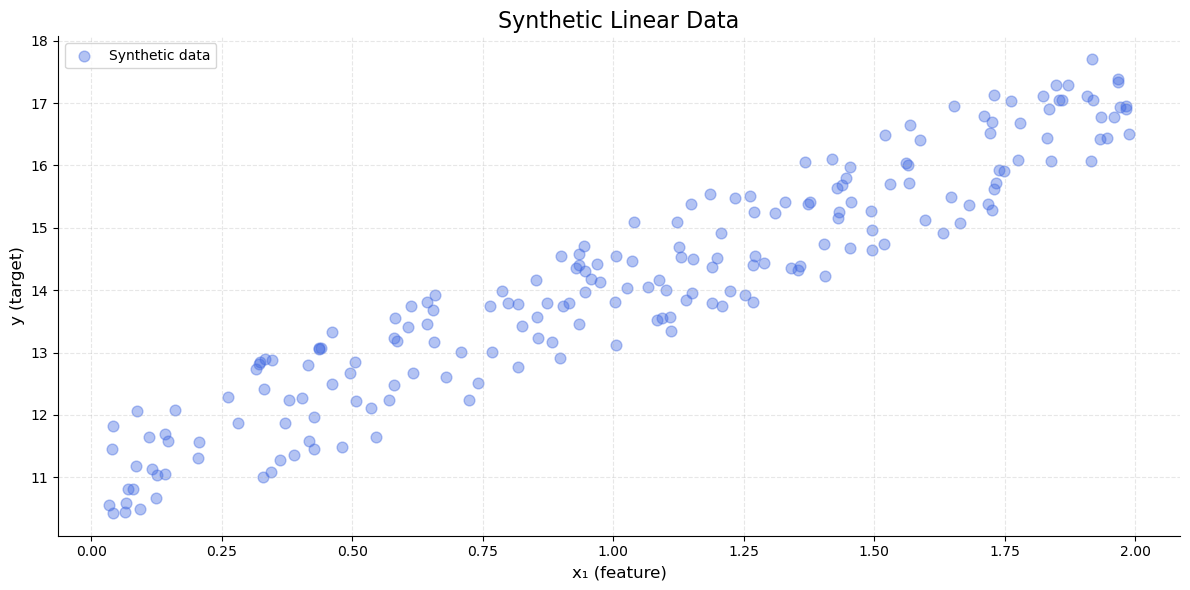

In [2]:
# 📊 Visualise the generated synthetic data
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(X, y, color='royalblue', s=60, alpha=0.4, label="Synthetic data")

ax.set_title("Synthetic Linear Data", fontsize=16)
ax.set_xlabel("x₁ (feature)", fontsize=12)
ax.set_ylabel("y (target)", fontsize=12)
ax.legend()

# Optional: turn off top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


## 3. Normal Equation vs. `sklearn` Linear Regression

There are two common ways to solve a linear regression problem:

1. **Normal Equation** (Analytical method):  
   This method uses a direct mathematical formula to calculate the best-fitting line:  
   $$
   \theta = (X^T X)^{-1} X^T y
   $$
   It’s simple and doesn’t require tuning hyperparameters like learning rate, but it can be computationally expensive when the number of features is large (since it involves inverting a matrix).
   **Note:** Sklearn will use normal equation to work out theta if the data size is small

2. **Using `sklearn.linear_model.LinearRegression`**:  
   This is the most practical and efficient approach for real-world problems. Scikit-learn handles all the computations under the hood, including fitting intercepts and working with multiple features. It's optimised for performance and widely used in production and research.

Let’s compare both methods using our synthetic dataset.


### 3.1 Normal Equation

In [3]:
# 👨‍🏫 Solve linear regression using the Normal Equation
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add bias term (column of 1s)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print(f"Theta (Normal Equation): {theta_best.ravel()}") # revel flatterns multi-dimentional array into an 1D array

# 📐 Predict using the learned parameters
X_new = np.linspace(X.min(), X.max(), 100).reshape(100, 1)
X_new_b = np.c_[np.ones((100, 1)), X_new]
y_pred_normal = X_new_b @ theta_best

Theta (Normal Equation): [11.01086285  3.01286353]


### 3.2 Sklearn's Linear Regression Model

In [4]:
# 🤖 Solve linear regression using scikit-learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_sklearn = lin_reg.predict(X_new)

print(f"Theta (sklearn): Intercept = {lin_reg.intercept_[0]:.2f}, Slope = {lin_reg.coef_[0][0]:.2f}")


Theta (sklearn): Intercept = 11.01, Slope = 3.01


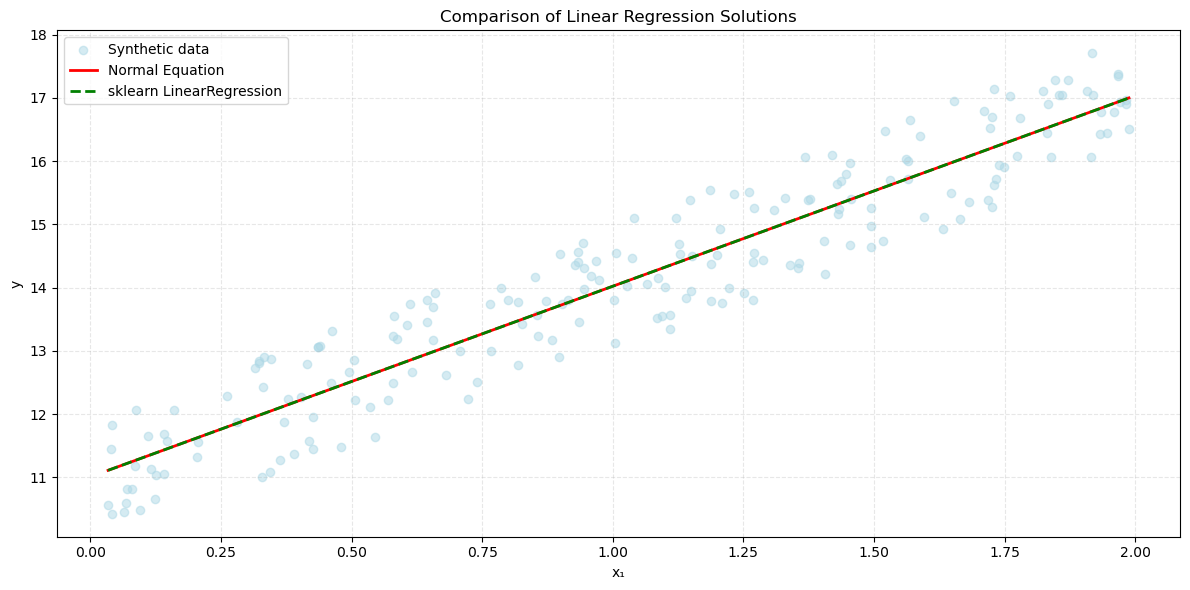

In [5]:
# 📊 Plot both fitted lines with the original data
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='lightblue', label="Synthetic data", alpha=0.5)

plt.plot(X_new, y_pred_normal, label="Normal Equation", color='red', linewidth=2)
plt.plot(X_new, y_pred_sklearn, label="sklearn LinearRegression", color='green', linestyle='--', linewidth=2)

plt.title("Comparison of Linear Regression Solutions")
plt.xlabel("x₁")
plt.ylabel("y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### 3.3 Summary: Two Ways to Solve Linear Regression

In this section, we explored two common approaches to solving linear regression:

- **Normal Equation** provides an exact mathematical solution using matrix operations:  
  $$
  \theta = (X^T X)^{-1} X^T y
  $$
  It’s easy to implement and doesn't require tuning parameters like the learning rate. However, it becomes inefficient and even unusable when dealing with large datasets or many features, because it involves computing the inverse of a matrix — a costly operation with complexity around $O(n^3)$. It also struggles with data where the matrix is not invertible or is poorly conditioned.

- **`sklearn.linear_model.LinearRegression`** is a widely used and optimised method that handles fitting under the hood. It works well for both small and large datasets and is often the go-to choice in practice due to its simplicity and performance.

Both methods produced very similar results on our synthetic dataset, showing they are functionally equivalent for small problems. However, in modern machine learning workflows, we rarely use the Normal Equation because:
- We often have many features (high-dimensional data)
- Matrix inversion is slow and memory-heavy
- Iterative methods are more flexible and scalable

This is where **Gradient Descent** comes in — a powerful optimisation algorithm that can handle large and complex problems without relying on matrix inversion. In the next section, we'll dive into how Gradient Descent works and how we can use it to learn the parameters of a linear model.


## 4. Components of Linear Regrssion

### 4.1 Understanding the Components: $x$, $\theta$, and $h_\theta(x)$

Before we dive into the cost function, let’s define the key components used in linear regression.

**Input features**  
Each training example is represented as a vector:

$$
x^{(i)} = [1,\ x_1^{(i)},\ x_2^{(i)},\ \dots,\ x_n^{(i)}]
$$

The leading 1 is added to account for the bias term $\theta_0$.

**Parameters (weights)**  
These are the coefficients the model learns:

$$
\theta = [\theta_0,\ \theta_1,\ \dots,\ \theta_n]
$$

**Hypothesis function**  
This is the linear function our model uses to make predictions:

$$
h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
$$

Or more compactly, using vector notation:

$$
h_\theta(x) = \theta^T x
$$

The goal of training is to find the best $\theta$ so that $h_\theta(x) \) is as close as possible to the actual output \( y \).


### 4.2 Cost Function: Measuring How Well the Model Fits

To evaluate the performance of our model, we use a **cost function** that measures the error between predicted and actual values.

The most common cost function for linear regression is **Mean Squared Error (MSE)**:

$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
$$

To simplify gradient descent calculations, we use a modified version:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
$$

This version makes the derivative cleaner, as the 2 cancels out:

- It ensures all errors are non-negative.
- It penalises large errors more heavily.
- It creates a **convex** shape, which guarantees a single global minimum when optimising.

The gradient (used in gradient descent) is:

$$
\nabla_\theta J(\theta) = \frac{1}{m} X^T (X\theta - y)
$$

By minimising the cost function, we can find the best parameters $\theta$ for our model.


The best description by Andrew Ng is here: https://www.youtube.com/watch?v=F6GSRDoB-Cg&t=369s

### 4.3 Understanding `y_hat` and `y`

In linear regression, we use the hypothesis function to make predictions:

This is often written as:

$$
\hat{y} = h_\theta(x) 
$$

In code, we refer to this predicted value as `y_hat` — it represents what the model thinks the output should be, given the input features and current weights.

Throughout this notebook:
- $\hat{y}$ or `y_hat` = model prediction
- $y$ = actual value from the dataset

In our linear regression implementation, two key terms appear frequently:

- **`y_hat` (predicted values)**  
  This represents the values predicted by our model using the current parameters $\theta$. It is calculated as:
  $$
  \hat{y} = X \cdot \theta
  $$

- **`y` (true values)**  
  These are the actual target values from the dataset — the values we want our model to predict. The difference between `y_hat` and `y` tells us how accurate the model is.

The goal of training is to make `y_hat` as close as possible to `y` by updating the values in $\theta$.


In [6]:
# 📉 Mean Squared Error Cost Function
def mse_cost(X, theta, y):
    """
    Computes the Mean Squared Error cost function:
    J(theta) = (1 / 2m) * sum((X*theta - y)^2)
    """
    m = len(y)
    y_hat = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((y_hat - y) ** 2)
    return cost

# 🔁 Gradient of the Cost Function (vectorised)
def mse_gradient(X, theta, y):
    """
    Computes the gradient (partial derivatives) of the MSE cost function
    """
    m = len(y)
    return (1 / m) * X.T.dot(X.dot(theta) - y)

# Example usage:
# Add bias column to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Initialise theta randomly
theta = np.random.randn(X_b.shape[1], 1)

# Compute cost and gradient
print("MSE Cost:", mse_cost(X_b, theta, y))
print("Gradient:", mse_gradient(X_b, theta, y))


MSE Cost: 97.849176556081
Gradient: [[-13.88148442]
 [-15.25206836]]


### 4.4 Gradient Descent: Learning by Minimising Error

To train our linear regression model, we need to find the best values for the weights $\theta$ that minimise the cost function. One popular optimisation method is **Gradient Descent**.

Imagine starting at a random point on the cost function curve (or surface). Gradient descent works by calculating the **slope (gradient)** of the cost function at that point and moving in the **opposite direction** — downhill — to reduce the error.

At each step, the parameters $\theta$ are updated using:

$$
\theta := \theta - \alpha \cdot \nabla_\theta J(\theta)
$$

Where:
- $\alpha$ is the **learning rate** — a small positive number that controls how big each step is.
- $\nabla_\theta J(\theta)$ is the gradient of the cost function with respect to $\theta$.

This process is repeated until the change in the cost function is very small (i.e., the gradient is close to zero), indicating that we have reached or are near a minimum.

> Note: The bias term $\theta_0$ is treated just like any other weight. To simplify computation, we include it as a weight for a feature $x_0 = 1$, and handle all weights together as a vector.


Initial X sample: [[1.         0.08705318]
 [1.         1.18517525]]
Initial theta: [0.63252517 0.98361676]
Iteration 0: Cost = 78.2777
Iteration 1000: Cost = 3.4513
Iteration 2000: Cost = 2.0075
Iteration 3000: Cost = 1.5361
Iteration 4000: Cost = 1.1908
Iteration 5000: Cost = 0.9329
Iteration 6000: Cost = 0.7403
Iteration 7000: Cost = 0.5965
Iteration 8000: Cost = 0.4891
Iteration 9000: Cost = 0.4088
10000 iterations completed


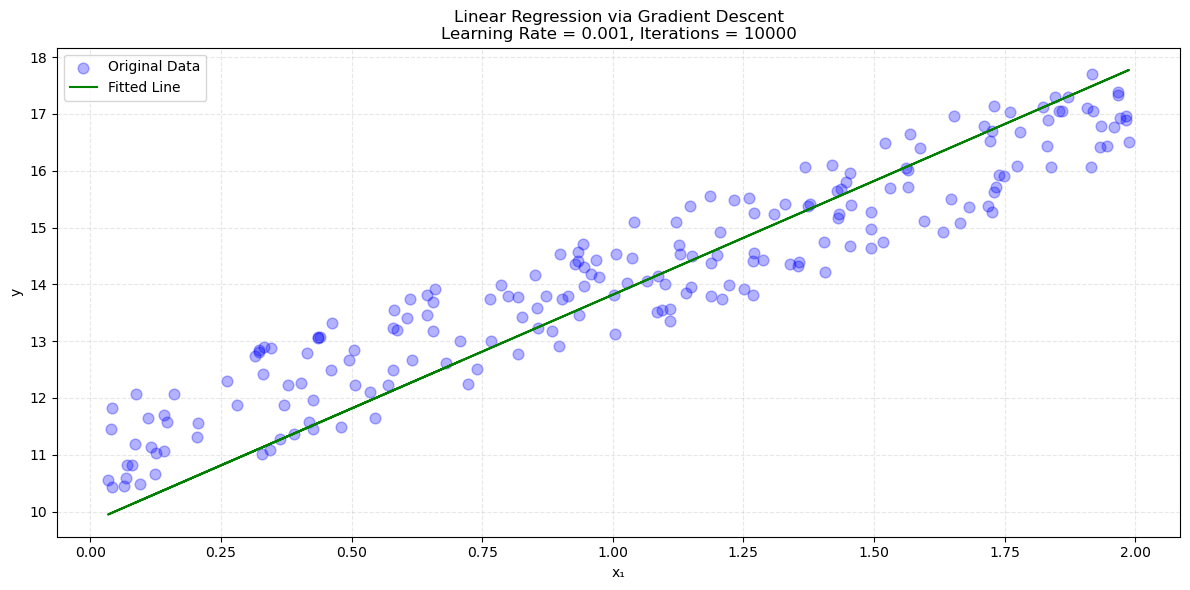

In [7]:
# Add bias column to X
X_with_bias = np.c_[np.ones(len(X)), X]

# Random initial weights: 2 values (bias and slope)
theta_init = np.random.rand(2, 1)

print("Initial X sample:", X_with_bias[:2])
print("Initial theta:", theta_init.ravel())

# ⛏ Gradient Descent Function
def gradient_descent(learn_rate, n_iter, X, theta, y):    
    cost_history = []
    
    for i in range(n_iter):                   
        gradients = mse_gradient(X, theta, y)
        theta = theta - learn_rate * gradients
        cost = mse_cost(X, theta, y)
        cost_history.append(cost)
        
        if i % 1000 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    
    print(f"{n_iter} iterations completed")
    return theta, cost_history

# 🔧 Set learning rate and iteration count
learning_rate = 0.001
iterations = 10000

# 🧠 Run gradient descent
final_theta, cost_history = gradient_descent(learning_rate, iterations, X_with_bias, theta_init, y)

# 📈 Make predictions using final weights
y_pred = X_with_bias @ final_theta

# 📊 Plot results
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(X, y, c='blue', s=60, alpha=0.3, label="Original Data")
ax.plot(X, y_pred, color='green', label="Fitted Line")
ax.set_title(f"Linear Regression via Gradient Descent\nLearning Rate = {learning_rate}, Iterations = {iterations}")
ax.set_xlabel("x₁")
ax.set_ylabel("y")
ax.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


## 5. Using `sklearn.linear_model.LinearRegression`

Instead of implementing linear regression from scratch, we can use the built-in `LinearRegression` class from **scikit-learn**, which provides a fast and easy way to fit a linear model.

This method:
- Handles the bias (intercept) automatically.
- Uses efficient numerical methods internally.
- Requires minimal code and works well for most practical applications.

Once the model is trained, we can use it to make predictions and compare the fitted line to our original data.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Intercept (bias): 11.0109
Slope: 3.0129


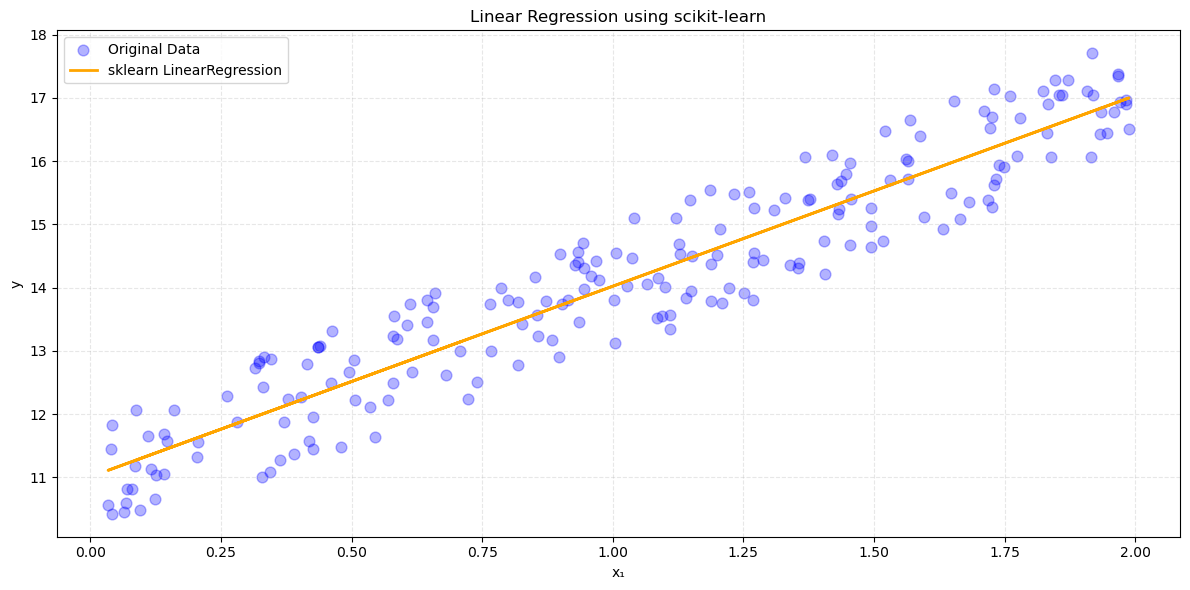

In [8]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X, y)  # Note: No need to manually add bias column — scikit-learn does it for you

# Display learned parameters
print(f"Intercept (bias): {model.intercept_[0]:.4f}")
print(f"Slope: {model.coef_[0][0]:.4f}")

# Predict values using the trained model
y_pred_sklearn = model.predict(X)

# Plot the fitted line
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(X, y, c='blue', s=60, alpha=0.3, label="Original Data")
ax.plot(X, y_pred_sklearn, color='orange', linewidth=2, label="sklearn LinearRegression")
ax.set_title("Linear Regression using scikit-learn")
ax.set_xlabel("x₁")
ax.set_ylabel("y")
ax.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Example: Predicting California House Prices

To demonstrate how linear regression works in practice, we'll use the **California Housing** dataset. It contains real-world data on various factors like house age, income, and number of rooms — along with the median house value in different districts.

For simplicity, we'll use just **one feature** (`MedInc`: median income) to predict house prices. This allows us to:
- Visualise the relationship clearly
- See how linear regression fits a trend line through the data

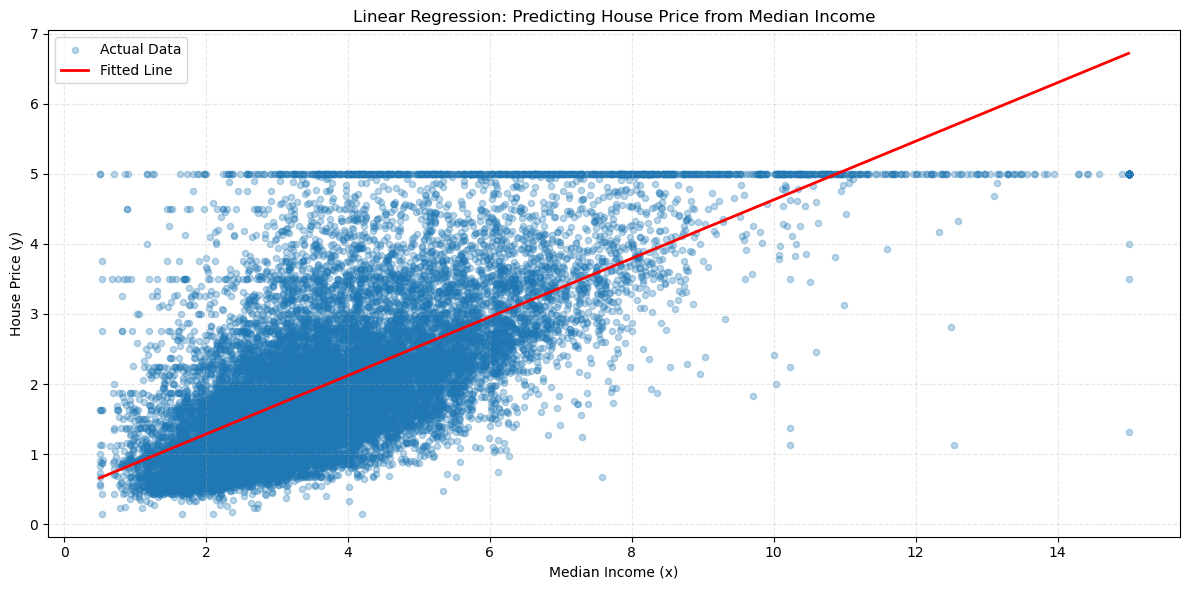

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# 🔽 Load dataset
california = fetch_california_housing()
X_full = california.data
y_full = california.target

# For simplicity: use only 'MedInc' (median income) as our single feature
feature_index = list(california.feature_names).index("MedInc")
X = X_full[:, [feature_index]]
y = y_full

# 📊 Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 🤖 Train model
model = LinearRegression()
model.fit(X_train, y_train)

# 📈 Predict for plotting
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

# 📊 Plot
plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.3, s=20, label="Actual Data")
plt.plot(x_range, y_pred, color="red", linewidth=2, label="Fitted Line")
plt.title("Linear Regression: Predicting House Price from Median Income")
plt.xlabel("Median Income (x)")
plt.ylabel("House Price (y)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

### 6.2 Multivariate Linear Regression with California Housing Data

Previously, we used only one feature (median income) to predict house prices. Now, we'll use **all available features** in the dataset to train a multivariate linear regression model.

This helps demonstrate:
- How linear regression handles multiple inputs
- How we evaluate model performance (e.g., using $R^2$ score)
- How real-world feature combinations improve predictions

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# X: all features, y: target (house value)
X = california.data
y = california.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", round(mse, 4))
print("R-squared Score (R²):", round(r2, 4))

# Optional: check the learned coefficients
for name, coef in zip(california.feature_names, model.coef_):
    print(f"{name:>10}: {coef:.4f}")

Mean Squared Error (MSE): 0.5411
R-squared Score (R²): 0.5911
    MedInc: 0.4476
  HouseAge: 0.0096
  AveRooms: -0.1248
 AveBedrms: 0.7945
Population: -0.0000
  AveOccup: -0.0034
  Latitude: -0.4186
 Longitude: -0.4334


### 6.3 Visualising Actual vs Predicted House Prices

To evaluate the performance of our linear regression model, we’ll plot the **actual values** of house prices against the **predicted values**.

- If predictions were perfect, all points would lie exactly on the diagonal line.
- Deviations from the line show the model’s error for those examples.

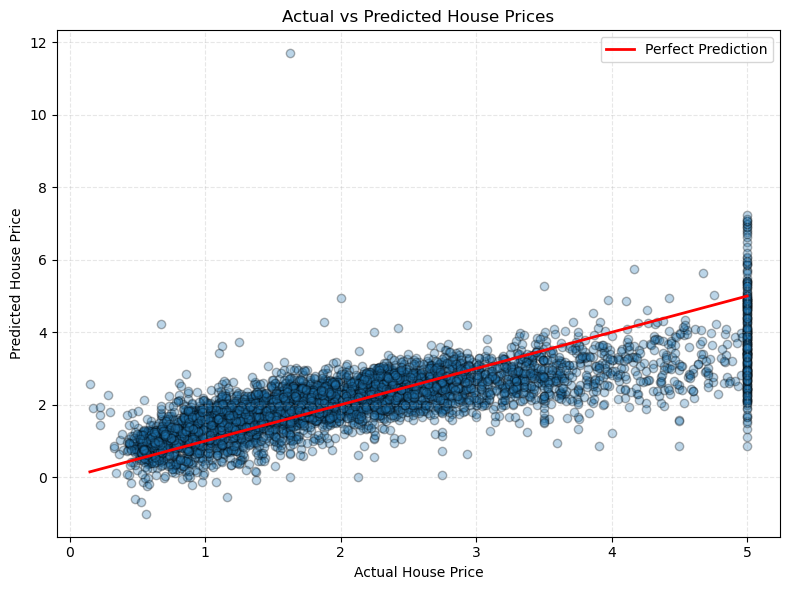

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label="Perfect Prediction")

plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Learning Curves: Training Size vs. Model Accuracy

To understand how model performance changes with the amount of training data, we plot **learning curves**:

- The **training error** shows how well the model fits the data it was trained on.
- The **validation error** shows how well the model generalises to unseen data.

Typically:
- With small training sets, the model overfits (low training error, high validation error).
- As training size increases, validation error decreases and stabilises.
- If both errors are high and close, the model is likely underfitting.

This visual helps diagnose whether collecting more data will improve performance.

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curves(model, X, y, step=100, min_size=50):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    sizes = range(min_size, len(X_train), step)
    
    for m in sizes:
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_mse = mean_squared_error(y_train[:m], y_train_predict)
        val_mse = mean_squared_error(y_val, y_val_predict)
        train_errors.append(np.sqrt(train_mse))
        val_errors.append(np.sqrt(val_mse))
    
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, train_errors, "r-+", linewidth=2, label="Training RMSE")
    plt.plot(sizes, val_errors, "b-", linewidth=2, label="Validation RMSE")
    plt.title("Learning Curves: Effect of Training Set Size")
    plt.xlabel("Training Set Size")
    plt.ylabel("Root Mean Squared Error (RMSE)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

When training instances are 1 or 2 points, error will be 0, but generalise very poorly therefore high error, as training increases, the error in training will go up until it plateaus.The validation set may go done. However, due to the polynomial nature of the data, the error remains high. This indicate model is underfitting

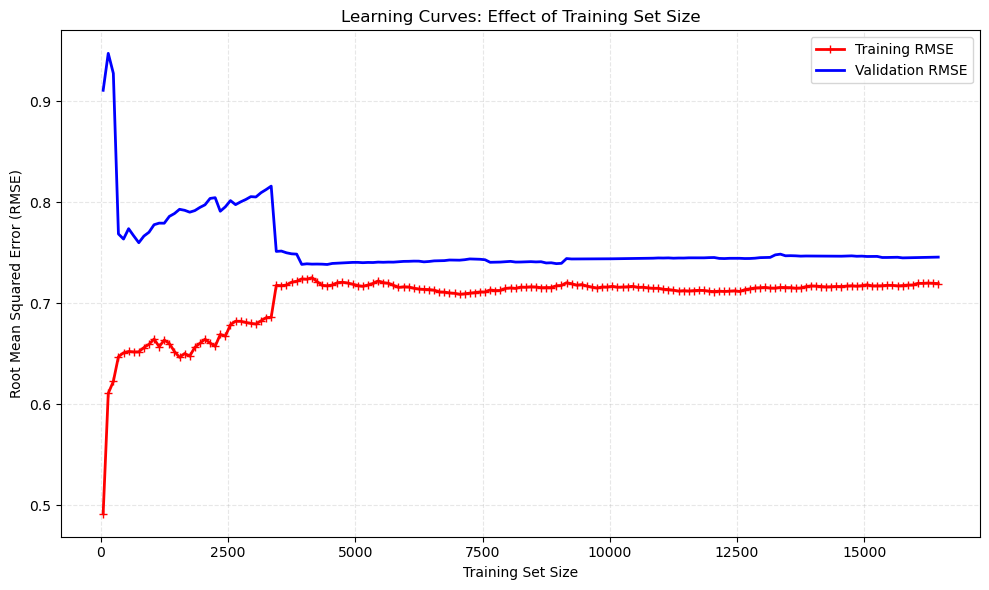

In [13]:
lin_reg = LinearRegression()
#X, y = generate_random_data()
plot_learning_curves(lin_reg, X, y)

## 8 Comparing Linear vs Polynomial Regression

Now we compare a **simple linear regression** model with a **polynomial regression** model (degree 20) on the same dataset.

- **Linear regression** assumes a straight-line relationship between the input and output.
- **Polynomial regression** allows for more flexible, curved fits by adding higher-order terms (e.g., $x^2$, $x^3$, ...).

This example helps us see:
- When linear models are too simple to capture the trend (underfitting)
- When polynomial models are too flexible and follow noise (overfitting)

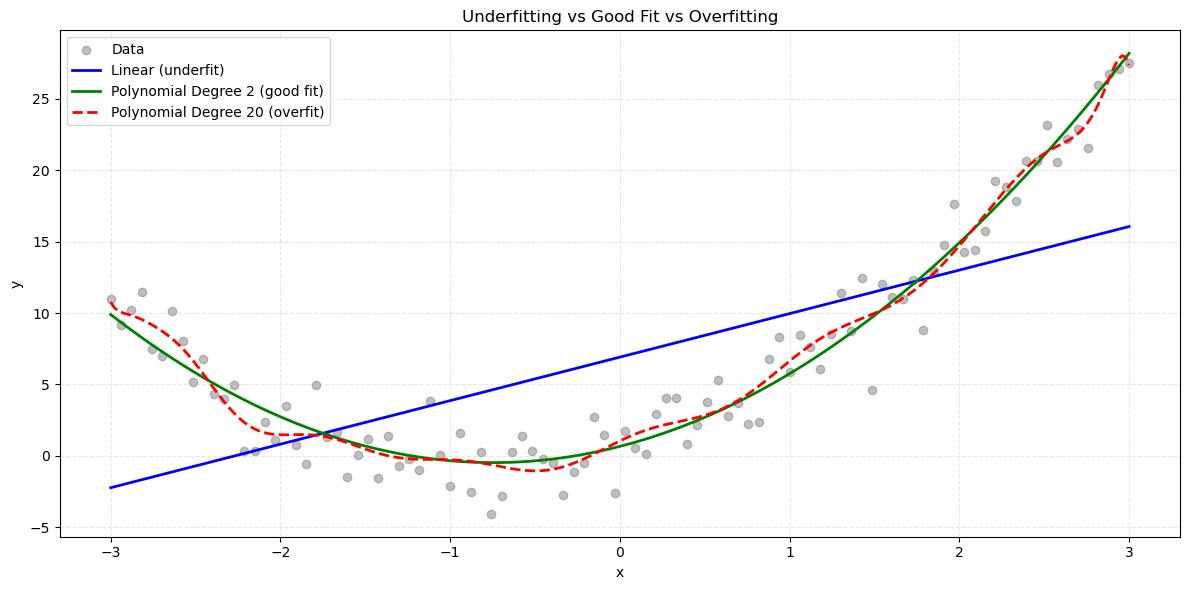

In [14]:
# Generate synthetic data: y = 2x² + 3x + 1 + noise
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2 * X**2 + 3 * X + 1 + np.random.randn(100, 1) * 2  # Add noise

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Helper: Create polynomial model
def make_poly_model(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("lin_reg", LinearRegression())
    ])

# Train models
model_linear = make_poly_model(1)
model_poly2 = make_poly_model(2)
model_poly20 = make_poly_model(20)

model_linear.fit(X, y)
model_poly2.fit(X, y)
model_poly20.fit(X, y)

# Predict
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_pred_linear = model_linear.predict(X_plot)
y_pred_poly2 = model_poly2.predict(X_plot)
y_pred_poly20 = model_poly20.predict(X_plot)

# Plot all
plt.figure(figsize=(12, 6))
plt.scatter(X, y, c='gray', alpha=0.5, label="Data")
plt.plot(X_plot, y_pred_linear, label="Linear (underfit)", color="blue", linewidth=2)
plt.plot(X_plot, y_pred_poly2, label="Polynomial Degree 2 (good fit)", color="green", linewidth=2)
plt.plot(X_plot, y_pred_poly20, label="Polynomial Degree 20 (overfit)", color="red", linestyle="--", linewidth=2)

plt.title("Underfitting vs Good Fit vs Overfitting")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

***Underfitting vs Overfitting with Synthetic Data***

The lines above shows three models:
- **Linear Regression**: too simple (underfits)
- **Polynomial Regression (degree=2)**: matches the true pattern (good fit)
- **Polynomial Regression (degree=20)**: too complex, fits the noise (overfits)

To clearly see the difference between underfitting, good fitting, and overfitting, we generate a synthetic dataset based on a known quadratic function:

$$
y = 2x^2 + 3x + 1 + \text{noise}
$$

The resulting plot visually shows how model complexity affects performance.

## 9. Bias–Variance Trade-Off

The **bias–variance trade-off** describes the balance between two sources of error:

- **Bias**: Error from overly simplistic models that fail to capture the underlying pattern. High bias leads to underfitting.
- **Variance**: Error from overly complex models that fit the training data too closely. High variance leads to overfitting.

We demonstrate this by:
1. Generating multiple noisy training sets.
2. Fitting three models with different complexities (degree 1, 2, and 20).
3. Visualising how much their predictions vary across different training sets.

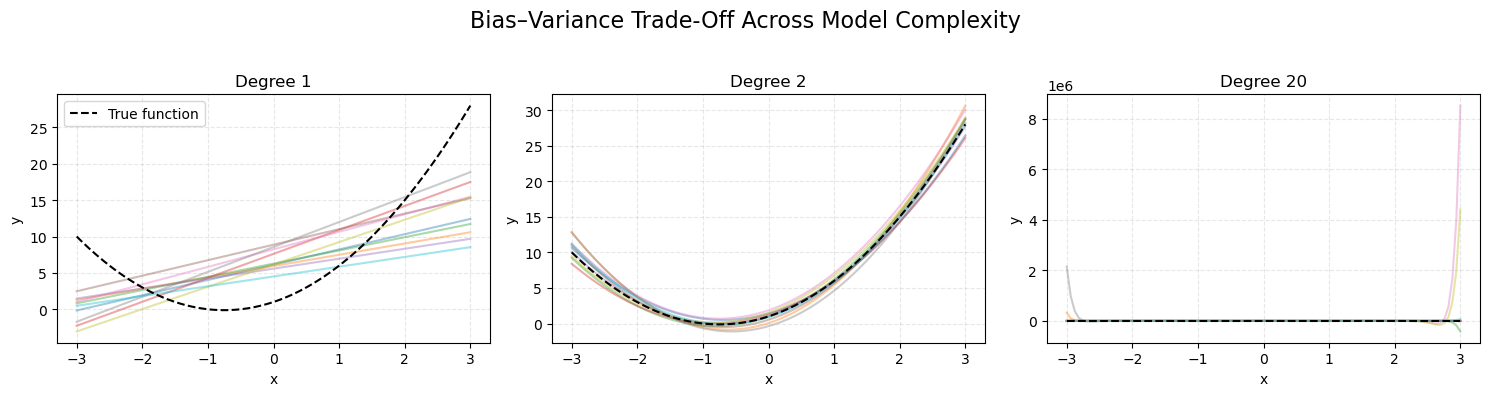

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(42)
n_datasets = 10
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
true_y = 2 * X_plot**2 + 3 * X_plot + 1  # true function (no noise)

degrees = [1, 2, 20]
colors = ["blue", "green", "red"]

plt.figure(figsize=(15, 4))

for i, degree in enumerate(degrees):
    plt.subplot(1, 3, i+1)
    for _ in range(n_datasets):
        # Generate noisy training data
        X_sample = np.random.uniform(-3, 3, 30).reshape(-1, 1)
        y_sample = 2 * X_sample**2 + 3 * X_sample + 1 + np.random.randn(30, 1) * 2
        
        # Fit model
        model = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LinearRegression())
        model.fit(X_sample, y_sample)
        
        # Predict
        y_pred = model.predict(X_plot)
        plt.plot(X_plot, y_pred, alpha=0.4)

    # Plot true function
    plt.plot(X_plot, true_y, color="black", linestyle="--", label="True function")
    plt.title(f"Degree {degree}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True, linestyle="--", alpha=0.3)
    if i == 0:
        plt.legend()

plt.suptitle("Bias–Variance Trade-Off Across Model Complexity", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 9.1 Generalisation and Variance: Training vs Validation Error

To generalise well, a model should not just perform well on training data, but also on **unseen validation data**.

We compare models of increasing complexity (polynomial degrees) and measure:
- **Training error**: how well the model fits known data.
- **Validation error**: how well the model performs on unseen data.

This reveals the **bias–variance trade-off**:
- Simple models have high bias (underfit both sets).
- Complex models have low training error but high variance (overfit training, perform poorly on validation).
- Generalisation improves when we **reduce variance**, even if it slightly increases training error.

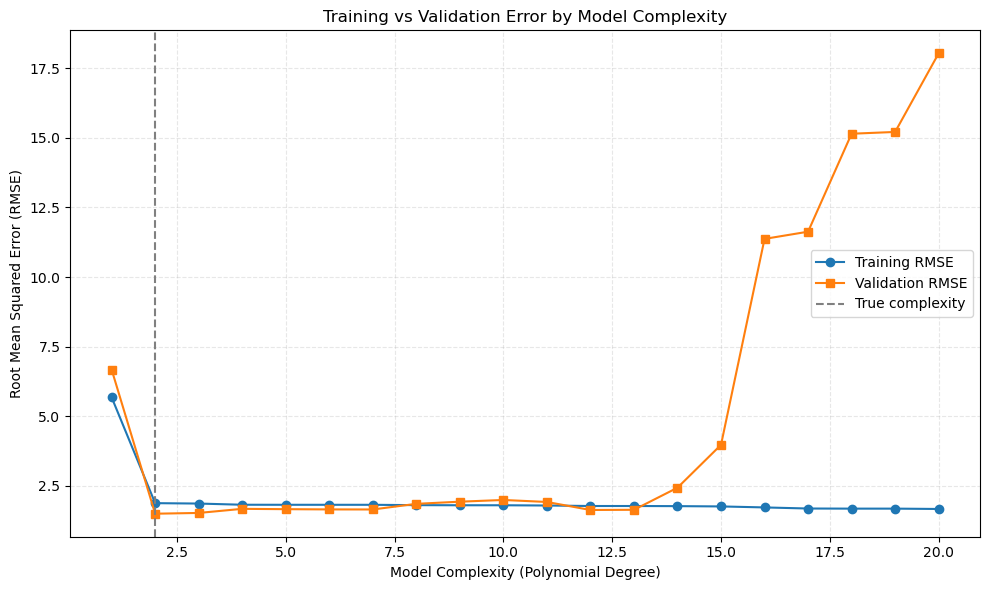

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create synthetic data
np.random.seed(42)
X_all = np.random.uniform(-3, 3, 100).reshape(-1, 1)
y_all = 2 * X_all**2 + 3 * X_all + 1 + np.random.randn(100, 1) * 2

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_all, y_all, test_size=0.3, random_state=42)

# Track errors
degrees = range(1, 21)
train_errors = []
val_errors = []

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LinearRegression())
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    
    train_errors.append(train_rmse)
    val_errors.append(val_rmse)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label="Training RMSE", marker='o')
plt.plot(degrees, val_errors, label="Validation RMSE", marker='s')
plt.axvline(x=2, color='gray', linestyle='--', label="True complexity")
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Training vs Validation Error by Model Complexity")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

## 10. What Is Irreducible Error?

Even with the best model and the best parameters, there will always be **some error** we can't eliminate. This is called the **irreducible error**.

Why does it exist?

- Real-world data often contains **random noise** — measurement errors, rounding, environmental variation, or factors we didn’t include in our model.
- No model, no matter how complex, can fully explain this randomness.
- This noise affects the target variable $y$ independently of the input $x$.

Mathematically, we often express the data-generating process as:

$$
y = f(x) + \varepsilon
$$

Where:
- $f(x)$ is the true (but unknown) function we want to approximate.
- $\varepsilon$ is the **irreducible error**, assumed to have mean 0 and some variance $\sigma^2$.

Even if we perfectly recover $f(x)$, we still can't predict the random part $\varepsilon$. Therefore:

> **Irreducible error sets the lower bound on how well any model can perform.**

This is why we evaluate model performance using metrics like **Mean Squared Error** (MSE), but understand that some portion of the error is **unavoidable**.

## 11 Regularisation in Linear Models

Regularisation helps prevent **overfitting** by discouraging overly complex models. In linear regression, this is done by adding a **penalty term** to the cost function to constrain the size of the model's weights (parameters).

The more the model tries to fit the data too closely (especially noisy data), the more complex and unstable it can become. Regularisation improves **generalisation** by keeping the weights small and preventing the model from relying too heavily on any one feature.


### 11.1 Ridge Regression (L2 Regularisation)

Ridge Regression (also known as **Tikhonov regularisation**) adds a penalty on the **squared values** of the weights. It encourages the model to **fit the data while keeping weights small**, but never forces them to zero.

#### 🧮 Cost Function:

$$
J(\theta) = \text{MSE}(\theta) + \frac{\alpha}{2} \sum_{j=1}^{n} \theta_j^2
$$

- $\alpha$ is a hyperparameter that controls the strength of the penalty.  
  - If $\alpha = 0$, this becomes ordinary linear regression.
- The penalty term is the **L2 norm** of the weights.

#### ✅ Use Ridge when:
- You want to prevent overfitting but still include all features.
- You have **many features** that may be correlated.


### 11.2 Lasso Regression (L1 Regularisation)

Lasso stands for **Least Absolute Shrinkage and Selection Operator**. It uses the **absolute values** of the weights as a penalty, which can shrink some weights **exactly to zero** — effectively removing features.

#### 🧮 Cost Function:

$$
J(\theta) = \text{MSE}(\theta) + \alpha \sum_{j=1}^{n} |\theta_j|
$$

- This is the **L1 norm** of the weights.

#### ✅ Use Lasso when:
- You want to perform **feature selection** automatically.
- Some features are **irrelevant or redundant**.


### 11.3 Elastic Net (Combination of L1 and L2)

Elastic Net combines both **L1 (Lasso)** and **L2 (Ridge)** regularisation. It provides a balance between **sparsity** (removing some features) and **stability** (shrinking weights).

#### 🧮 Cost Function:

$$
J(\theta) = \text{MSE}(\theta) + \alpha \left[ r \sum_{j=1}^{n} |\theta_j| + \frac{1 - r}{2} \sum_{j=1}^{n} \theta_j^2 \right]
$$

- $\alpha$ controls the overall regularisation strength.
- $r$ is the **mixing ratio**:
  - $r = 1$ → Lasso
  - $r = 0$ → Ridge
  - $0 < r < 1$ → Elastic Net

#### ✅ Use Elastic Net when:
- You want the benefits of both Lasso and Ridge.
- You suspect that **some features should be excluded**, but others should be retained with small influence.



### 🧠 Summary

### 📋 Summary: Ridge vs Lasso vs Elastic Net

| Method       | Penalty Type | Effect on Weights                  | Feature Selection |
|--------------|--------------|------------------------------------|-------------------|
| Ridge        | L2 (sum of squares)     | Shrinks all weights (none to zero)    | ❌ No              |
| Lasso        | L1 (sum of absolutes)   | Shrinks some weights to exactly zero  | ✅ Yes             |
| Elastic Net  | L1 + L2 (combined)      | Shrinks and selects features          | ✅ Yes             |

- **Ridge** keeps all features but reduces their influence.
- **Lasso** automatically removes irrelevant features.
- **Elastic Net** combines both approaches for better balance.

Regularisation is a powerful tool to improve **model generalisation**, especially when you have **many features**, noisy data, or potential overfitting.

### 12 Early Stopping: Preventing Overfitting and Saving Time

**Early stopping** is a regularisation technique used to improve a model's ability to generalise to new data. Instead of training for a fixed number of epochs, early stopping monitors the model’s performance on a **validation set** and halts training as soon as the validation error **stops improving**.

This helps avoid **overfitting**, where the model continues to optimise on training data but starts performing worse on unseen data.

#### 12.1 How It Works:
1. Split your data into training and validation sets.
2. Train the model incrementally (e.g. using SGD).
3. After each epoch:
   - Evaluate the model on the validation set.
   - If validation error improves, save the model.
   - If it worsens or stagnates for too long, stop training.

This technique is especially useful for models trained with **stochastic gradient descent (SGD)** or other iterative methods.

### 12.2 Time Saving

Early stopping also provides a significant **time-saving benefit**. By halting training as soon as performance plateaus, we avoid unnecessary computation and training time. This is particularly helpful when:
- Working with large datasets or high-dimensional data
- Using slow or resource-intensive training loops
- Performing hyperparameter tuning or repeated model evaluations

> ✅ Early stopping leads to faster training, simpler models, and better generalisation — making it one of the most practical and effective techniques in machine learning.

In [17]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress convergence warnings from SGDRegressor
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessing pipeline (polynomial + standardisation)
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=True)),
    ("scaler", StandardScaler())
])

# Transform both training and validation sets
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)  # use transform here, not fit_transform

# Configure SGDRegressor
sgd_reg = SGDRegressor(
    max_iter=1,
    warm_start=True,            # Keep updating model in each loop
    penalty=None,               # No regularisation here
    learning_rate="constant",
    eta0=0.0005,
    random_state=42
)

min_val_error = float("inf")
best_epoch = None
best_model = None

# Manual early stopping loop
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)

    if val_error < min_val_error:
        min_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

print(f"Best model found at epoch {best_epoch} with validation RMSE = {np.sqrt(min_val_error):.4f}")

Best model found at epoch 827 with validation RMSE = 1.5740


## 13 Gradient Descent vs Stochastic Gradient Descent (SGD)

**Gradient Descent (GD)** is an optimisation algorithm used to minimise a cost function by updating model parameters (like weights) in the direction of the steepest descent.

There are two common variants:

### 13.1 🟢 **Batch Gradient Descent** (what we implemented earlier)

- Uses **all training samples** to compute the gradient at each step.
- Produces a **precise but slow** update.
- Ideal for small to medium datasets.

🧮 Update rule:

$$
\theta := \theta - \alpha \cdot \nabla J(\theta)
$$

Where $\nabla J(\theta)$ is calculated using **the entire dataset**.


### 13.2 🔵 **Stochastic Gradient Descent (SGD)**

- Uses **only one training sample** (or a small batch) to compute the gradient.
- Updates are **fast and noisy**, which can help escape local minima.
- Works well with large datasets and in online learning settings.

🧮 Update rule:

$$
\theta := \theta - \alpha \cdot \nabla J^{(i)}(\theta)
$$

Where $J^{(i)}(\theta)$ is the loss for a **single training example**.

### 13.3 🧠 Summary:

| Feature        | Gradient Descent       | Stochastic Gradient Descent (SGD) |
|----------------|------------------------|-----------------------------------|
| Data per step  | All training examples  | One example (or mini-batch)       |
| Update speed   | Slow but stable        | Fast but noisy                    |
| Convergence    | Smooth, but may get stuck | Noisy, but may escape local minima |
| Best for       | Small datasets         | Large datasets, online learning   |

In [18]:
def batch_gradient_descent(X, theta, y, learning_rate=0.01, n_iter=1000):
    m = len(y)
    cost_history = []

    for i in range(n_iter):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost = (1 / (2 * m)) * np.sum((X.dot(theta) - y) ** 2)
        cost_history.append(cost)

    return theta, cost_history


def stochastic_gradient_descent(X, theta, y, learning_rate=0.01, n_epochs=50):
    m = len(y)
    cost_history = []

    for epoch in range(n_epochs):
        for i in range(m):
            xi = X[i:i+1]  # 1 sample (row)
            yi = y[i:i+1]
            gradients = xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients

        # compute cost once per epoch (optional)
        cost = (1 / (2 * m)) * np.sum((X.dot(theta) - y) ** 2)
        cost_history.append(cost)

    return theta, cost_history

### 13.4 Convergence Comparison: Batch Gradient Descent vs Stochastic Gradient Descent

This plot compares the convergence behaviour of **Batch Gradient Descent (BGD)** and **Stochastic Gradient Descent (SGD)** over 50 epochs.

#### 🟦 Batch Gradient Descent
- Computes the gradient using **all training data** at each step.
- The convergence is **smooth and stable**, but slower.
- Ideal for smaller datasets where computation cost is not a concern.

#### 🟧 Stochastic Gradient Descent
- Updates weights using **only one training sample** at a time.
- Converges **much faster initially** due to rapid updates.
- The path is **noisier**, but helps reach a good solution quickly.
- More efficient for large datasets.

#### ✅ Observation
- SGD reaches a low cost **much faster** than BGD in early epochs.
- BGD progresses steadily but more slowly.
- The difference demonstrates the **efficiency vs stability trade-off**:
  - **SGD is fast and noisy**.
  - **BGD is slow and precise**.

In practice, we often use **mini-batch gradient descent** (a middle ground), or combine SGD with techniques like **early stopping** and **learning rate schedules** to improve convergence and generalisation.

In [28]:
X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]        # add ones to X for X_0
theta_init = np.random.randn(X_with_bias.shape[1], 1)   # randomise theta

# Compare GD and SGD
#theta_gd, cost_gd = batch_gradient_descent(X_with_bias, theta_init.copy(), y, learning_rate=0.01)
theta_sgd, cost_sgd = stochastic_gradient_descent(X_with_bias, theta_init.copy(), y, learning_rate=0.01, n_epochs=150)
theta_gd, cost_gd = batch_gradient_descent(X_with_bias, theta_init.copy(), y, learning_rate=0.01, n_iter=150)

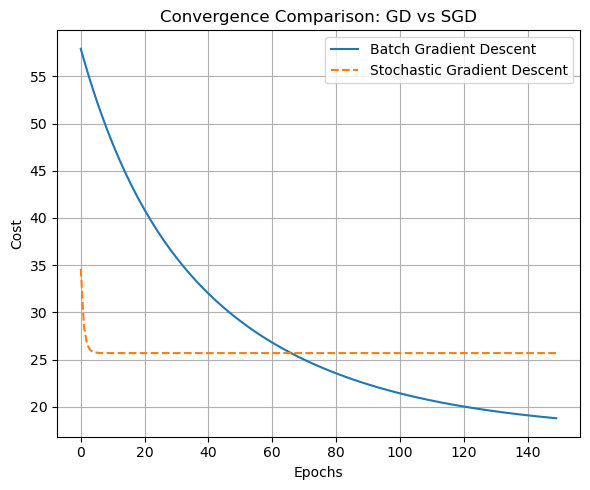

In [29]:
plt.figure(figsize=(6, 5))
plt.plot(range(len(cost_gd)), cost_gd, label="Batch Gradient Descent")
plt.plot(range(len(cost_sgd)), cost_sgd, label="Stochastic Gradient Descent", linestyle="--")
plt.title("Convergence Comparison: GD vs SGD")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Why SGD Plateaus Early**

1. Noisy updates
- SGD updates the model based on one training sample at a time.
- This makes the updates inherently noisy — the gradient isn’t a perfect reflection of the cost surface.
- As a result, SGD can bounce around near the minimum without settling.

2. Constant learning rate
- The implementation we are using has learning_rate="constant" (e.g., eta0 = 0.01 or 0.001).
- With a fixed learning rate, SGD cannot make finer adjustments as it gets closer to the minimum.
- It essentially “jitters” around the low-cost area and never quite converges.
	
3. No learning rate decay or momentum
- Real-world SGD implementations often include:
	- Learning rate decay (to reduce the step size over time)
	- Momentum (to smooth noisy updates)
	- Mini-batching (to reduce variance)
	- Without these, SGD becomes unstable at low error regions.